In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import testing_utils
from src import utils, gen_spectra

# Define data

In [14]:
# refresh metadata
with open('metadata.txt', 'w') as m:
    m.close()

datasets = testing_utils.define_data()

# Generate correct data

In [3]:
correct_sequences = testing_utils.generate_truth_set(datasets[0])

ppm_tolerance = 20

# Load in spectra

In [4]:
for dataset in datasets:
    input_spectra_path = dataset[0]
    spectra = []
    input_list = testing_utils.preprocess_input_spectra(input_spectra_path, ppm_tolerance)
    [spectra.append(x) for x in input_list]

Loading spectra...
File /mnt/c/Users/Maxim/Documents/Layer_Lab/Database/raw_inputs/NOD2_E3/mzml/.DS_Store is not of supported types (mzML, mzXML)
Done


# Collect metadata

In [17]:
# refresh metadata
with open('metadata.txt', 'w') as m:
    m.close()

print('Collecting metadata...')
avg_hits = 0
total_hits = 0
tot_ideal_spec_length = 0
tot_measured_spec_length = 0
count = 0

hit_abundances = []
miss_abundances = []
misleading_abundances = []
all_hits = []
all_misses = []
ListOfLen = []

for i, spectrum in enumerate(spectra):
    max_abundance = 0
    found = False
    initial_hits = []
    input_spectrum = spectrum[0]
    input_abundance_set = spectrum[1]
    precursor_mass = spectrum[5]
    precursor_charge = spectrum[6]
    ideal_spectrum = gen_spectra.gen_spectrum(correct_sequences[i])
    # Checking input_spectrum for hits
    for a, j in enumerate(input_spectrum):
        #Finding max abundance
        if (input_abundance_set[a] > max_abundance):
            max_abundance = input_abundance_set[a]
            max_abundance_location = a

        for k in ideal_spectrum:
            tolerance = utils.ppm_to_da(j, ppm_tolerance)
            if testing_utils.isintolerance(j, k, tolerance):
                initial_hits.append(j)
                all_hits.append(j)
                hit_abundances.append(input_abundance_set[a])
                found = True

        if found == False:
            all_misses.append(j)
            miss_abundances.append(input_abundance_set[a])

    misleading = False
    for l in ideal_spectrum:
        tolerance = utils.ppm_to_da(l, ppm_tolerance)
        if testing_utils.isintolerance(input_spectrum[max_abundance_location], l, tolerance):
            misleading = True

    if (misleading == True):
        misleading_abundances.append(i)

    # Checking precursor mass
    tolerance = utils.ppm_to_da(precursor_mass, ppm_tolerance)
    if (not testing_utils.isintolerance(precursor_mass, gen_spectra.get_precursor(correct_sequences[i], precursor_charge), tolerance)):
        count = count + 1

    with open('metadata.txt', 'a') as m:
        m.write(str(i) + ': ')
        m.write(str(initial_hits) + '\n')
        ListOfLen.append(len(initial_hits))
        total_hits = total_hits + len(initial_hits)
        tot_ideal_spec_length = tot_ideal_spec_length + len(ideal_spectrum)
        tot_measured_spec_length = tot_measured_spec_length + len(input_spectrum)

avg_hits = total_hits / i
# Collecting average abundance
avg_hit_abundance = testing_utils.get_average_from_set(hit_abundances)
avg_miss_abundance = testing_utils.get_average_from_set(miss_abundances)
# Collecting total length
total_length = testing_utils.get_total_length(correct_sequences)
with open('metadata.txt', 'a') as m:
    m.write('total number of hits: ' + str(len(all_hits)) + ' out of ' + str(tot_ideal_spec_length) + ' potential hits ' + '(' + str(round((len(all_hits) / tot_ideal_spec_length) * 100)) + '%)' + '\n')
    m.write('total number of misses: ' + str(len(all_misses)) + ' out of ' + str(tot_ideal_spec_length) + ' potential hits ' + '(' + str(round((len(all_misses) / tot_ideal_spec_length) * 100)) + '%)' + '\n')
    m.write(str(round((total_hits/tot_measured_spec_length) * 100)) + '% of m/z values in input spectra correlated to a correct hit \n')
    m.write(str(round((len(all_misses)/tot_measured_spec_length) * 100)) + '% of m/z values in input spectra correlated to a miss \n')
    m.write('average number of hits per spectrum: ' + str(avg_hits) + '\n')
    m.write('average length of correct sequences: ' + str(total_length / i) + '\n')
    m.write('Precursor was not found in data for ' + str(count) + '/' + str(i + 1) + ' spectra\n')
    m.write('Average abundance of a hit: ' + str(avg_hit_abundance) + '\n')
    m.write('Average abundance of a miss: ' + str(avg_miss_abundance) + '\n')
    m.write(str(len(misleading_abundances)) + ' times it the largest abundance was misleading, this happened at ' + str(misleading_abundances) + '\n')
    m.write('max abundance of a hit: ' + str(max(hit_abundances)) + ', min abundance of a hit: ' + str(min(hit_abundances)) + '\n')
    m.write('max abundance of a miss: ' + str(max(miss_abundances)) + ', min abundance of a miss: ' + str(min(miss_abundances)) + '\n')

print('Done')

Done


# Printing results

In [16]:
with open('metadata.txt', 'r') as m:
    for line in m:
        print(line)

0: [132.10121154785156, 261.1429443359375, 341.1453857421875, 349.1622619628906, 374.2223205566406, 440.216064453125, 569.2589721679688, 697.3143310546875, 810.3919677734375, 939.4456176757812]

1: [90.05471801757812, 189.1231231689453, 229.1175079345703, 318.1653747558594, 321.6759338378906, 357.17529296875, 378.21807861328125, 422.73681640625, 431.24578857421875, 442.736328125, 458.2235412597656, 492.27880859375, 502.28509521484375, 571.3067626953125, 615.36279296875, 615.3828735351562, 642.345458984375, 716.40576171875, 755.4296264648438, 844.4696044921875, 884.4728393554688, 983.5274658203125]

2: [148.0608367919922, 229.11912536621094, 261.14373779296875, 332.1795654296875, 357.1768493652344, 378.21270751953125, 445.2651672363281, 458.2254333496094, 546.3069458007812, 571.3041381835938, 642.34326171875, 674.3845825195312, 755.4293823242188]

3: [132.10177612304688, 203.13851928710938, 229.11920166015625, 286.158447265625, 316.2172546386719, 321.67767333984375, 357.17694091796875, 

851: [182.0775604248047, 230.07595825195312, 310.1765441894531, 317.1056213378906, 447.250732421875, 466.272216796875, 512.7730712890625, 586.3079833984375, 650.8267822265625, 652.35400390625, 692.2818603515625, 700.3624267578125, 743.8751220703125, 765.4395141601562, 800.8966674804688, 858.40625, 893.4966430664062, 1024.5401611328125, 1171.60546875, 1300.6492919921875]

852: [166.086181640625, 229.11549377441406, 279.16973876953125, 385.7025146484375, 407.26385498046875, 446.2509765625, 479.73638916015625, 538.2997436523438, 667.3729248046875, 669.3457641601562, 763.3834838867188, 770.396484375, 831.9348754882812, 857.4292602539062, 888.4795532226562, 952.9921264648438, 958.4708862304688, 1017.5208129882812, 1099.04443359375, 1149.56884765625, 1243.6009521484375, 1309.124755859375, 1374.659912109375]

853: [166.08599853515625, 229.1180877685547, 279.1700134277344, 376.1836853027344, 385.70001220703125, 407.2645568847656, 429.2117919921875, 538.3053588867188, 626.3360595703125, 669.343

992: [166.08555603027344, 215.1014404296875, 302.1351318359375, 313.1537170410156, 449.20098876953125, 548.2720947265625, 661.35693359375, 808.4288330078125]

993: [118.08439636230469, 203.06381225585938, 246.14564514160156, 316.14825439453125, 387.18560791015625, 409.7271423339844, 502.29827880859375, 534.2482299804688, 601.3667602539062, 748.4293212890625, 818.430908203125, 819.473388671875, 889.4755249023438, 1017.5350952148438]

994: [156.07725524902344, 229.1176300048828, 285.11737060546875, 448.18115234375, 454.26531982421875, 505.20111083984375, 545.242431640625, 593.774169921875, 634.2477416992188, 735.2883911132812, 832.3435668945312, 961.3776245117188]

995: [132.09994506835938, 229.1194305419922, 260.1980285644531, 343.161376953125, 361.241943359375, 472.20404052734375, 490.28009033203125, 545.7836303710938, 585.2921142578125, 587.3369140625, 732.3563232421875, 734.4036254882812, 847.4905395507812, 976.5220947265625, 1090.5838623046875]

996: [231.16871643066406, 292.6918029

# Plots

# Abundance of a hit vs abundance of a miss

1690.9642333984375
20892
36422
588.64306640625
341211.12
119697.62


Text(0, 0.5, 'Abundance')

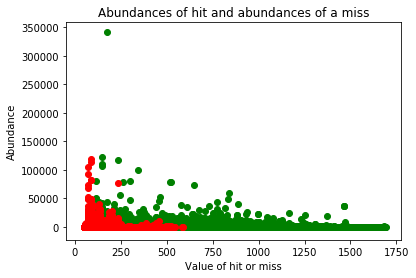

In [13]:
plt.scatter(all_hits, hit_abundances, s=None, c='green')
plt.scatter(all_misses, miss_abundances, s=None, c='red')
print(max(all_hits))
print(len(all_hits))
print(len(all_misses))
print(max(all_misses))
print(max(hit_abundances))
print(max(miss_abundances))
plt.title('Abundances of hit and abundances of a miss')
plt.xlabel('Value of hit or miss')
plt.ylabel('Abundance')

# Number of hits per Spectrum

In [28]:
# Plotting number of hits

plt.scatter(ListOfLen, y)
plt.xlabel('Spectrum number')
plt.ylabel('Number of hits found')
plt.title('Number of hits found per Spectrum in NOD2_E3 dataset')
print('Max: ', max(ListOfLen))
print('Min: ', min(ListOfLen))

NameError: name 'y' is not defined

# Distribution of hits

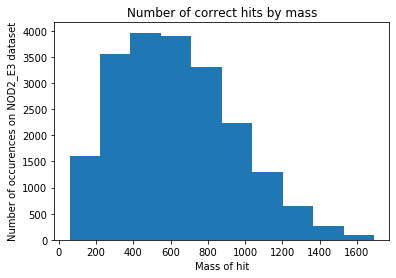

In [29]:
arr = np.array(all_hits)

plt.hist(arr)
plt.xlabel('Mass of hit')
plt.ylabel('Number of occurences on NOD2_E3 dataset')
plt.title('Number of correct hits by mass')
plt.show() 

# Other important information

total number of hits: 20892 out of 73928 potential hits (28%) 

5% of m/z values in input spectrum correlated to a correct hit 

average number of hits per spectrum: 19.255299539170508 

average length of correct sequences: 17.04147465437788 

Precursor was not found in data for 0/1086 spectra 

Average abundance of a hit: 1167.0282287647412 

Average abundance of a miss: 328.8986035783848 
